In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image   #importing required libraries

In [22]:
#reading the datafile and converting into a dataframe
data=pd.read_csv('alphabets_28x28.csv')
data_old=pd.DataFrame(data)
data_old 

C:\Users\Fawwaz\AppData\Local\Temp\ipykernel_28972\1577398275.py:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('alphabets_28x28.csv')


,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#removing the corrupted rows
condition = data_old['label'] == "This"
data_df=data_old[~condition]
data_df

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#choosing only some rows due to space error
interval = 5
data_sorted=data_df.iloc[::interval]
#choosing some other rows
data_other=data_df.iloc[1::interval]
#choosing some other rows
data_other2=data_df.iloc[2::interval]
#choosing some other rows
data_other3=data_df.iloc[3::interval]
#choosing some other rows
data_other4=data_df.iloc[4::interval]

In [25]:
#separating the input pixel values
input_values=data_sorted.drop('label', axis=1)
input_values2=data_other.drop('label', axis=1)
input_values3=data_other2.drop('label', axis=1)
input_values4=data_other3.drop('label', axis=1)
input_values5=data_other4.drop('label', axis=1)

In [26]:
#getting the respective output results
output_values=data_sorted[['label']]
output_values2=data_other[['label']]
output_values3=data_other2[['label']]
output_values4=data_other3[['label']]
output_values5=data_other4[['label']]

In [27]:
#converting the output into ascii code and then changing it into  range of 0-25 since we have 26 alphabets
output=output_values.astype(str).values
output_modify=output.astype(str)
output_flat=output_modify.flatten()
m=output_flat.size
output_ascii=np.zeros(m)

output2=output_values2.astype(str).values
output_modify2=output2.astype(str)
output_flat2=output_modify2.flatten()
x=output_flat2.size
output_ascii2=np.zeros(x)

output3=output_values3.astype(str).values
output_modify3=output3.astype(str)
output_flat3=output_modify3.flatten()
x=output_flat3.size
output_ascii3=np.zeros(x)

output4=output_values4.astype(str).values
output_modify4=output4.astype(str)
output_flat4=output_modify4.flatten()
x=output_flat4.size
output_ascii4=np.zeros(x)

output5=output_values5.astype(str).values
output_modify5=output5.astype(str)
output_flat5=output_modify5.flatten()
x=output_flat5.size
output_ascii5=np.zeros(x)


for i in range(m):
    output_ascii[i]=ord(output_flat[i])

for i in range(x):
    output_ascii2[i]=ord(output_flat2[i])
    output_ascii3[i]=ord(output_flat3[i])
    output_ascii4[i]=ord(output_flat4[i])
    output_ascii5[i]=ord(output_flat5[i])
    
output_new=output_ascii-65
output_new2=output_ascii2-65
output_new3=output_ascii3-65
output_new4=output_ascii4-65
output_new5=output_ascii5-65

In [28]:
#converting input dataframe to array of floats
input_arr=input_values.values
input_arr2=input_values2.values
input_arr3=input_values3.values
input_arr4=input_values4.values
input_arr5=input_values5.values

input_int=input_arr.astype(float)
input_int2=input_arr2.astype(float)
input_int3=input_arr3.astype(float)
input_int4=input_arr4.astype(float)
input_int5=input_arr5.astype(float)

In [46]:
#starting the neural network with layers
model=Sequential(
    [   tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(100, activation="relu", name="L1"),
        tf.keras.layers.Dense(40, activation="relu", name="L2"),
        tf.keras.layers.Dense(26, activation="linear", name="L3")    
    ], name="my_model" 
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [47]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 40)                  │           4,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 26)                  │           1,066 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,606 (326.59 KB)

 Trainable params: 83,606 (326.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
[layer1, layer2, layer3] = model.layers

In [49]:
#function to plot the loss over the loop
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 1])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

In [50]:
#calculating loss and training to minimize it 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history1 = model.fit(
    input_int,output_new,
    epochs=30
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.8368
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.7509
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0860
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6233
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4464
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3691
Epoch 7/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3160
Epoch 8/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2930
Epoch 9/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2702
Epoch 10/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2495
Epoch 11/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2372
Epoch 12/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2262
Epoch 13/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2180
Epoch 14/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2103
Epoch 15/30
2322/2322 ━━━━━━━

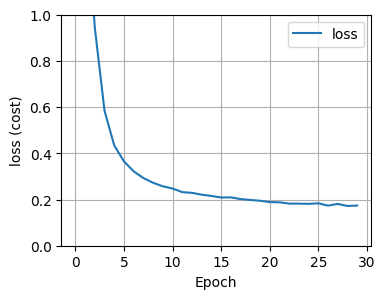

In [51]:
plot_loss_tf(history1)

In [52]:
history2 = model.fit(
    input_int2,output_new2,
    epochs=30
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3773
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2638
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2415
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2263
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2256
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2222
Epoch 7/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2066
Epoch 8/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1959
Epoch 9/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1979
Epoch 10/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1912
Epoch 11/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1864
Epoch 12/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2007
Epoch 13/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1882
Epoch 14/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1791
Epoch 15/30
2322/2322 ━━━━━━━

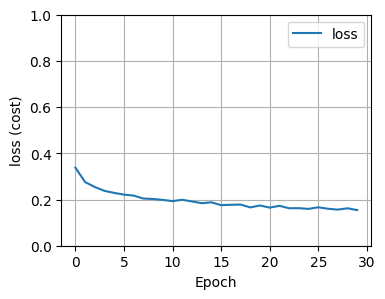

In [53]:
plot_loss_tf(history2)

In [54]:
history3 = model.fit(
    input_int3,output_new3,
    epochs=30
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4109
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2606
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2396
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2260
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2064
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2100
Epoch 7/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2010
Epoch 8/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1941
Epoch 9/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1907
Epoch 10/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1894
Epoch 11/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1791
Epoch 12/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1743
Epoch 13/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1681
Epoch 14/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1788
Epoch 15/30
2322/2322 ━━━━━━━

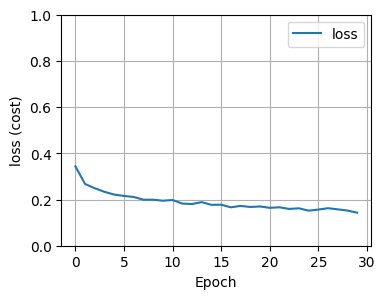

In [55]:
plot_loss_tf(history3)

In [56]:
history4 = model.fit(
    input_int4,output_new4,
    epochs=30
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4163
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2746
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2421
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2231
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2187
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2163
Epoch 7/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2002
Epoch 8/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2036
Epoch 9/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1956
Epoch 10/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1879
Epoch 11/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1806
Epoch 12/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1805
Epoch 13/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1728
Epoch 14/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1741
Epoch 15/30
2322/2322 ━━━━━━━

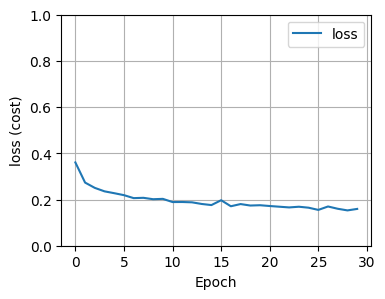

In [57]:
plot_loss_tf(history4)

In [58]:
#checking prediction before training on the 5th dataset
model_ans=model.predict(input_int5)
model_ans

2322/2322 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step


array([[  48.55877  ,   34.340084 ,  -12.672574 , ...,    7.927426 ,
          32.589252 ,   25.53069  ],
       [  21.625652 ,   13.488452 ,  -13.691959 , ...,   -7.1039705,
           4.046773 ,    2.2355533],
       [   9.289284 ,    6.3278832,   -5.665993 , ...,   -2.1106095,
           0.6960671,   -0.6436665],
       ...,
       [  73.07928  ,  103.72424  ,   99.89385  , ...,  108.20922  ,
         127.456024 ,  143.45364  ],
       [-215.28683  , -401.99744  , -392.97025  , ..., -474.56964  ,
        -388.4936   ,  118.52463  ],
       [ 137.27599  ,  241.21124  ,  180.95906  , ...,  102.84977  ,
         226.44109  ,  418.3258   ]], dtype=float32)

In [59]:
q=model_ans.shape[0]
model_out=np.zeros(q)
for i in range(q):
    final=np.argmax(model_ans[i])
    model_out[i]=final
error_arr=model_out-output_new5
error=np.sum(error_arr)
cost=(error**2)/(2*q)
cost
error

-189.0

In [60]:
t=0
for i in range(q):
    if(model_out[i]!=output_new5[i]):
        t=t+1
t

5004

In [61]:
accuracy=(q-t)/q
accuracy

0.9326314655752713

In [62]:
history5 = model.fit(
    input_int5,output_new5,
    epochs=30
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4112
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2677
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2430
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2389
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2219
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2103
Epoch 7/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2089
Epoch 8/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2055
Epoch 9/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1997
Epoch 10/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1967
Epoch 11/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1922
Epoch 12/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1808
Epoch 13/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1863
Epoch 14/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1759
Epoch 15/30
2322/2322 ━━━━━━━

In [63]:
model.save('my_model.keras')

In [65]:
#function to return the contents in the image
def image_output(image_opened):
    #dividing the image such that each alphabet forms 28x28 pixel image
    line_n=image_opened.resize((280,336))
    pixels=np.array(line_n)
    input_px=np.zeros(94080)
    input_px.resize((120,784))   #creating the array to be passed for prediction
    #algorithm to extract the pixel values of each alphabet and store in input array in the correct order
    m=0
    n=0
    for i in range(120):
        s=0
        for j in range(28):
            for k in range(28):
                input_px[i][s]=pixels[j+m][k+n]
                s=s+1
                if(((k+1)//28) == 1 and (n+k)!=279 and s==784):  #changing columns after one alphabet completed
                    n=n+28
                if((n+k==279) and (s==784) and ((i+1)%10==0)):   #chaging row after one line completed
                    n=0
                    m=m+28
    #predicting each alphabet by passing each row of input array in the model
    result=[]
    for f in range(120):
        testing=input_px[f]
        testing_togive=testing.reshape((1,784))
        black=np.zeros(784)
        black_test=black.reshape((1,784))
        #give space if there is no letter found else it was giving the most probable letter
        if(np.array_equal(testing_togive,black_test)):
            result.append(" ")
        else:
            predictio=model.predict(testing_togive)
            prediction_s=tf.nn.softmax(predictio)  #using the softmax activation function
            final=np.argmax(prediction_s) + 65
            result.append(chr(final))
    #converting the list into string for better understanding of result
    string = ''.join(map(str,result))
    return string


In [66]:
line_1=Image.open('line_1.png')
line1_out=image_output(line_1)
line1_out
            

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

'I AM REALCY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATZVE '

In [67]:
line_2=Image.open('line_2.png')
line2_out=image_output(line_2)
line2_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

'IT IS FRUSYKPTLPF TVMY YYY YYYYTJYYY YYTIYYTYYJYTYYYYJYTYYYTJJJJTLJJJ LJYNLJJJJCPJMLJJLJ CXENYYYLL JON AKNJANSS         '

In [68]:
line_3=Image.open('line_3.png')
line3_out=image_output(line_3)
line3_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

'Z AM DELIGHTEO BY JOUR BRIENDLINESS AND YOU ALWAYS MAKE EVEEYONE FEEL WELCOME WHICH FOSTELS A SENSE OF COMMUNITT        '

In [69]:
line_5=Image.open('line_5.png')
line5_out=image_output(line_5)
line5_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━

'YOUR AWALYSIS OF THE UATA WAS ACCURATE AND WELL PRESENTED KROVIDING A CLEAR UNDRRSTANMING OF THR TREWDS AND PATTERNS    '

In [70]:
line_6=Image.open('line_6.png')
line6_out=image_output(line_6)
line6_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━

'THE MEETINM MXHUTQW YPTYTPXCYTYYJYTYFJPYYTYYYYYYYYLCYYT YJSYJJJJJLTJJJJJLCCLLTZLNJJPNNYLEYCLYJJJJSSNNPPYBHS MYDE        '

In [116]:
line_4=Image.open('line_4.png')
line4_out=image_output(line_4)
line4_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━

'IT IS WONDERFUL THAT YOU ALWAYS SHOW KZNDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINS AND APPRECIATEW     '

In [71]:
#geting started with the sentiment analysis
data_senti=pd.read_csv('sentiment_analysis_dataset.csv')
data_s=pd.DataFrame(data_senti)
data_s

,line,sentiment
0,I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...,Angry
1,IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...,Angry
2,I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...,Angry
3,IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...,Angry
4,I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...,Angry
5,IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND Y...,Angry
6,I AM REALLY ANGRY BECAUSE YOU NEVER PREPARE FO...,Angry
7,IT INFURIATES ME THAT YOU NEVER APPRECIATE THE...,Angry
8,I CANNOT STAND HOW YOU ALWAYS TALK DOWN TO PEO...,Angry
9,IT IS VERY DISAPPOINTING THAT YOU NEVER FOLLOW...,Angry


In [103]:
#adding the data of each sentiment into one array and then splitting them into individual words and storing it
#for angry,happy and neutral
angry=str()
happy=str()
neutral=str()
n=10
s=20
for i in range(10):
    angry=angry+data_s.iloc[i,0]
    happy=happy+data_s.iloc[i+n,0]
    neutral=neutral+data_s.iloc[i+s,0]
#splitting each array into individual words
angry_words=angry.split()
happy_words=happy.split()
neutral_words=neutral.split()
#storing number of words in each sentiment
a=len(angry_words)
h=len(happy_words)
n=len(neutral_words)
sentiment=[None]*6

In [78]:
emot=['angry','happy','neutral']

In [79]:
line1_out

'I AM REALCY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATZVE '

In [80]:
#words1=line1_out.split()

In [84]:
'''senti1=np.ones(3)
for word in words1:
    senti1[0]=((angry.count(word)+1)/a)*senti1[0]
    senti1[1]=((happy.count(word)+1)/h)*senti1[1]
    senti1[2]=((neutral.count(word)+1)/n)*senti1[2]
x=np.argmax(senti1)
emot[x]'''

'happy'

In [85]:
line1="I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE"

In [104]:
words1=line1.split()
senti1=np.ones(3)
for word in words1:
    senti1[0]=((angry.count(word)+1)/a)*senti1[0]
    senti1[1]=((happy.count(word)+1)/h)*senti1[1]
    senti1[2]=((neutral.count(word)+1)/n)*senti1[2]
x=np.argmax(senti1)
sentiment[0]=emot[x]

In [105]:
line2_out

'IT IS FRUSYKPTLPF TVMY YYY YYYYTJYYY YYTIYYTYYJYTYYYYJYTYYYTJJJJTLJJJ LJYNLJJJJCPJMLJJLJ CXENYYYLL JON AKNJANSS         '

In [106]:
line2="IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS"

In [107]:
words2=line2.split()
senti2=np.ones(3)
for word in words2:
    senti2[0]=((angry.count(word)+1)/a)*senti2[0]
    senti2[1]=((happy.count(word)+1)/h)*senti2[1]
    senti2[2]=((neutral.count(word)+1)/n)*senti2[2]
y=np.argmax(senti2)
sentiment[1]=emot[y]

In [108]:
line3_out

'Z AM DELIGHTEO BY JOUR BRIENDLINESS AND YOU ALWAYS MAKE EVEEYONE FEEL WELCOME WHICH FOSTELS A SENSE OF COMMUNITT        '

In [110]:
'''words3=line3_out.split()
senti3=np.ones(3)
for word in words2:
    senti3[0]=((angry.count(word)+1)/a)*senti3[0]
    senti3[1]=((happy.count(word)+1)/h)*senti3[1]
    senti3[2]=((neutral.count(word)+1)/n)*senti3[2]
z=np.argmax(senti3)
emot[z]'''

'words3=line3_out.split()\nsenti3=np.ones(3)\nfor word in words2:\n    senti3[0]=((angry.count(word)+1)/a)*senti3[0]\n    senti3[1]=((happy.count(word)+1)/h)*senti3[1]\n    senti3[2]=((neutral.count(word)+1)/n)*senti3[2]\nz=np.argmax(senti3)\nemot[z]'

In [111]:
line3="I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY"

In [113]:
words3=line3.split()
senti3=np.ones(3)
for word in words3:
    senti3[0]=((angry.count(word)+1)/a)*senti3[0]
    senti3[1]=((happy.count(word)+1)/h)*senti3[1]
    senti3[2]=((neutral.count(word)+1)/n)*senti3[2]
z=np.argmax(senti3)
sentiment[2]=emot[z]

In [117]:
line4_out

'IT IS WONDERFUL THAT YOU ALWAYS SHOW KZNDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINS AND APPRECIATEW     '

In [119]:
words4=line4_out.split()
senti4=np.ones(3)
for word in words4:
    senti4[0]=((angry.count(word)+1)/a)*senti4[0]
    senti4[1]=((happy.count(word)+1)/h)*senti4[1]
    senti4[2]=((neutral.count(word)+1)/n)*senti4[2]
s4=np.argmax(senti4)
sentiment[3]=emot[s4]

In [120]:
line5_out

'YOUR AWALYSIS OF THE UATA WAS ACCURATE AND WELL PRESENTED KROVIDING A CLEAR UNDRRSTANMING OF THR TREWDS AND PATTERNS    '

In [122]:
words5=line5_out.split()
senti5=np.ones(3)
for word in words5:
    senti5[0]=((angry.count(word)+1)/alen)*senti5[0]
    senti5[1]=((happy.count(word)+1)/hlen)*senti5[1]
    senti5[2]=((neutral.count(word)+1)/nlen)*senti5[2]
s5=np.argmax(senti5)
sentiment[4]=emot[s5]

In [123]:
line6_out

'THE MEETINM MXHUTQW YPTYTPXCYTYYJYTYFJPYYTYYYYYYYYLCYYT YJSYJJJJJLTJJJJJLCCLLTZLNJJPNNYLEYCLYJJJJSSNNPPYBHS MYDE        '

In [124]:
line6="THE MEETING MINUTES YOU PREPARED WERE DETAILED AND WELL ORGANISED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE"

In [126]:
words6=line6.split()
senti6=np.ones(3)
for word in words6:
    senti6[0]=((angry.count(word)+1)/alen)*senti6[0]
    senti6[1]=((happy.count(word)+1)/hlen)*senti6[1]
    senti6[2]=((neutral.count(word)+1)/nlen)*senti6[2]
s6=np.argmax(senti6)
sentiment[5]=emot[s6]

In [131]:
#sentiment conveyed in each line
labels=np.arange(1,7)
Sentiment_analysis=pd.Series(data=sentiment,index=labels)
Sentiment_analysis_data=pd.DataFrame(Sentiment_analysis,labels,['Sentiment'])
Sentiment_analysis_data


,Sentiment
1,angry
2,angry
3,happy
4,happy
5,neutral
6,neutral
